# rCSI released by WFP (vam food security analysis)

The complete version of the data released by WFP regarding the Reduced Coping Strategy Index (rCSI). For more details, see the notebook of the demo version.

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import numpy as np
import ntpath
import glob
plt.style.use("ggplot")

In [2]:
# Read the data released by wfp regarding the rCSI indicator.
path = "./wfp_data/"
all_files = glob.glob(path + "*.csv")

dfs = []

for filename in all_files:
    df = pd.read_csv(filename)
    df["Country"] = ntpath.basename(filename).split(".")[0]
    dfs.append(df)

df = pd.concat(dfs, axis = 0, ignore_index = True)
df.head()

SvyDate        Date             Dmgrph  DmgrphCode  Mean_crrnt  \
0  2019-7-15_2019-9-8  2019-09-08  BOUCLE-DU-MOUHOUN    900712.0   19.499504   
1  2019-7-15_2019-9-8  2019-09-08           CASCADES    900713.0    8.430561   
2  2019-7-15_2019-9-8  2019-09-08             CENTRE    900714.0    7.589967   
3  2019-7-15_2019-9-8  2019-09-08         CENTRE-EST    900715.0   20.051049   
4  2019-7-15_2019-9-8  2019-09-08        CENTRE-NORD    900716.0   18.757613   

         Pop   PopNmbr       Country  
0  1976217.0  385352.0  Burkina Faso  
1   822445.0   69336.0  Burkina Faso  
2  2854356.0  216644.0  Burkina Faso  
3  2854356.0  572328.0  Burkina Faso  
4  1687858.0  316601.0  Burkina Faso

### Brief keys description

- *SvyDate*: reference period of the data collection.
- *Date*: reference date (i.e. the end of the reference period). 
- *Dmgrph*: administrative area name.
- *DmgrphCode*: a code for identyfing the adminstrata.
- *Mean_crrnt*: corresponds to the % of people with rCSI>=19. 
- *Pop*: area population size.
- *PopNmbr*: number of people with rCSI>=19 (i.e. Mean_crrnt * Pop).

In [3]:
# Check if the dataframe contains NaN values.
df.isnull().sum()

SvyDate         0
Date            0
Dmgrph          0
DmgrphCode    524
Mean_crrnt      2
Pop             2
PopNmbr         2
Country         0
dtype: int64

In [4]:
# Let's delete the item 'DmgrphCode'.
df.drop(["DmgrphCode"], axis = 1, inplace = True) 

In [5]:
# Rename some columns.
df.rename(columns = {"Date": "Datetime", "Dmgrph": "AdminStrata", "Mean_crrnt": "Metric"}, inplace = True)

In [6]:
df.head()

SvyDate    Datetime        AdminStrata     Metric        Pop  \
0  2019-7-15_2019-9-8  2019-09-08  BOUCLE-DU-MOUHOUN  19.499504  1976217.0   
1  2019-7-15_2019-9-8  2019-09-08           CASCADES   8.430561   822445.0   
2  2019-7-15_2019-9-8  2019-09-08             CENTRE   7.589967  2854356.0   
3  2019-7-15_2019-9-8  2019-09-08         CENTRE-EST  20.051049  2854356.0   
4  2019-7-15_2019-9-8  2019-09-08        CENTRE-NORD  18.757613  1687858.0   

    PopNmbr       Country  
0  385352.0  Burkina Faso  
1   69336.0  Burkina Faso  
2  216644.0  Burkina Faso  
3  572328.0  Burkina Faso  
4  316601.0  Burkina Faso

### Country key

In [7]:
print("The countries are:", ", ".join(df.Country.unique()))

The countries are: Burkina Faso, Nigeria, Syria, Yemen


### AdminStrata key

In [8]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen**: the administrative division of Yemen is divided into two main divisions (governorates and districts). There are 22 governorates, including the capital Sana'a (Amanat Al Asimah) and Socotra Archipelago. The rCSI dataframe has the values of all the 22 governorates.

In [9]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(22,)


array(['Abyan', 'Aden', 'Al Bayda', "Al Dhale'e", 'Al Hudaydah',
       'Al Jawf', 'Al Maharah', 'Al Mahwit', 'Amanat Al Asimah', 'Amran',
       'Dhamar', 'Hadramaut', 'Hajjah', 'Ibb', 'Lahj', 'Marib', 'Raymah',
       "Sa'ada", "Sana'a", 'Shabwah', 'Socotra', 'Taizz'], dtype=object)

- **Nigeria**: Nigeria is divided into 36 states. The AdminStrata items of the rCSI dataframe cover 3 states (Adamawa, Borno and Yobe) and each of these state is diveded into three parts: North, South, Central.

In [10]:
print(AdminStratas["Nigeria"].shape)
AdminStratas["Nigeria"]

(9,)


array(['Adamawa Central', 'Adamawa North', 'Adamawa South',
       'Borno Central', 'Borno North', 'Borno South', 'Yobe East',
       'Yobe North', 'Yobe South'], dtype=object)

- **Syria**: the governatores of the Syria country are 14. The rCSI dataframe has the values of 13 governorates (Idlib governatore not included).

In [11]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(13,)


array(['Al-Hasakeh', 'Aleppo', 'As-Sweida', 'Damascus', "Dar'a", 'Hama',
       'Homs', 'Lattakia', 'Rural Damascus', 'Tartous', 'Ar-Raqqa',
       'Deir-ez-Zor', 'Quneitra'], dtype=object)

- **Burkina Faso**: Burkina Faso is divided into 13 administrative regions. The rCSI dataframe has the values of all 13 regions.

In [12]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['BOUCLE-DU-MOUHOUN', 'CASCADES', 'CENTRE', 'CENTRE-EST',
       'CENTRE-NORD', 'CENTRE-OUEST', 'CENTRE-SUD', 'EST',
       'HAUTS-BASSINS', 'NORD', 'PLATEAU-CENTRAL', 'SAHEL', 'SUD-OUEST'],
      dtype=object)

In [13]:
# The strings of AdminStrata key for Burkina Faso country are uppercase, I change them to obtain lowercase with first capital letter.
def to_lower(country, admin):
    if country == "Burkina Faso":
        admin = admin.lower().title()      
    return admin
    
df["AdminStrata"] = df[["Country", "AdminStrata"]].apply(lambda x: to_lower(*x), axis = 1)

In [14]:
# Check the min e max values of the Metric.
print(df.Metric.min(), df.Metric.max())

0.0 99.97458240652935


In [15]:
# Creation of an accurate datetime format (not consider the item 'SvyDate').
df.drop(["SvyDate"], axis = 1, inplace = True) 
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.sort_values("Datetime", ascending = True, inplace = True) # Sort on datetime.
df = df.groupby(["Country", "AdminStrata"]).apply(lambda group: group.set_index("Datetime").resample("D").mean()).reset_index()
df.reset_index(drop = True, inplace = True)
df.head()

Country        AdminStrata   Datetime     Metric        Pop   PopNmbr
0  Burkina Faso  Boucle-Du-Mouhoun 2019-09-08  19.499504  1976217.0  385352.0
1  Burkina Faso  Boucle-Du-Mouhoun 2019-09-09  19.567379  1976217.0  386693.0
2  Burkina Faso  Boucle-Du-Mouhoun 2019-09-10  20.400684  1976217.0  403161.0
3  Burkina Faso  Boucle-Du-Mouhoun 2019-09-11  20.405577  1976217.0  403258.0
4  Burkina Faso  Boucle-Du-Mouhoun 2019-09-12  19.238527  1976217.0  380195.0

In [16]:
# Create a dataframe with multi index column in order to have a summary dataframe of the time-series.
df.drop(labels = ["Pop", "PopNmbr"], axis = 1, inplace = True)
df = df.set_index(["Datetime", "Country", "AdminStrata"]).unstack(["Country", "AdminStrata"])
df.columns = df.columns.droplevel(0)
df.columns = pd.MultiIndex.from_tuples(list(map(lambda x: tuple(list(x) + ["*rCSI"]), df.columns)))
freq = "D"
df.index.freq = freq
df.head()

Burkina Faso                                         \
           Boucle-Du-Mouhoun Cascades Centre Centre-Est Centre-Nord   
                       *rCSI    *rCSI  *rCSI      *rCSI       *rCSI   
Datetime                                                              
2018-08-22               NaN      NaN    NaN        NaN         NaN   
2018-08-23               NaN      NaN    NaN        NaN         NaN   
2018-08-24               NaN      NaN    NaN        NaN         NaN   
2018-08-25               NaN      NaN    NaN        NaN         NaN   
2018-08-26               NaN      NaN    NaN        NaN         NaN   

                                                              ...      Yemen  \
           Centre-Ouest Centre-Sud   Est Hauts-Bassins  Nord  ...     Hajjah   
                  *rCSI      *rCSI *rCSI         *rCSI *rCSI  ...      *rCSI   
Datetime                                                      ...              
2018-08-22          NaN        NaN   NaN           NaN   NaN  ...  66.698570   
2018-08-23          NaN        NaN   NaN           NaN   NaN  ...  61.331133   
2018-08-24          NaN        NaN   NaN           NaN   NaN  ...  62.286205   
2018-08-25          NaN        NaN   NaN           NaN   NaN  ...  59.525377   
2018-08-26          NaN        NaN   NaN           NaN   NaN  ...  59.384136   

                                                                              \
                  Ibb       Lahj      Marib     Raymah     Sa'ada     Sana'a   
                *rCSI      *rCSI      *rCSI      *rCSI      *rCSI      *rCSI   
Datetime                                                                       
2018-08-22  60.797456  44.782684  60.490004  56.301100  46.435518  52.667849   
2018-08-23  61.011650  44.038726  59.568557  57.324106  45.261947  50.214606   
2018-08-24  62.032249  43.296925  58.277608  57.417614  44.520462  50.073157   
2018-08-25  60.993741  42.149079  56.908462  55.324169  46.345940  48.791655   
2018-08-26  58.800240  42.146629  57.722567  57.666522  43.294599  48.839640   

                                             
              Shabwah    Socotra      Taizz  
                *rCSI      *rCSI      *rCSI  
Datetime                                     
2018-08-22  34.302200  38.303104  50.919038  
2018-08-23  36.742499  39.545071  50.415852  
2018-08-24  35.857748  41.867782  49.391298  
2018-08-25  34.658434  48.585591  50.302392  
2018-08-26  35.913080  48.662394  50.293046  

[5 rows x 57 columns]

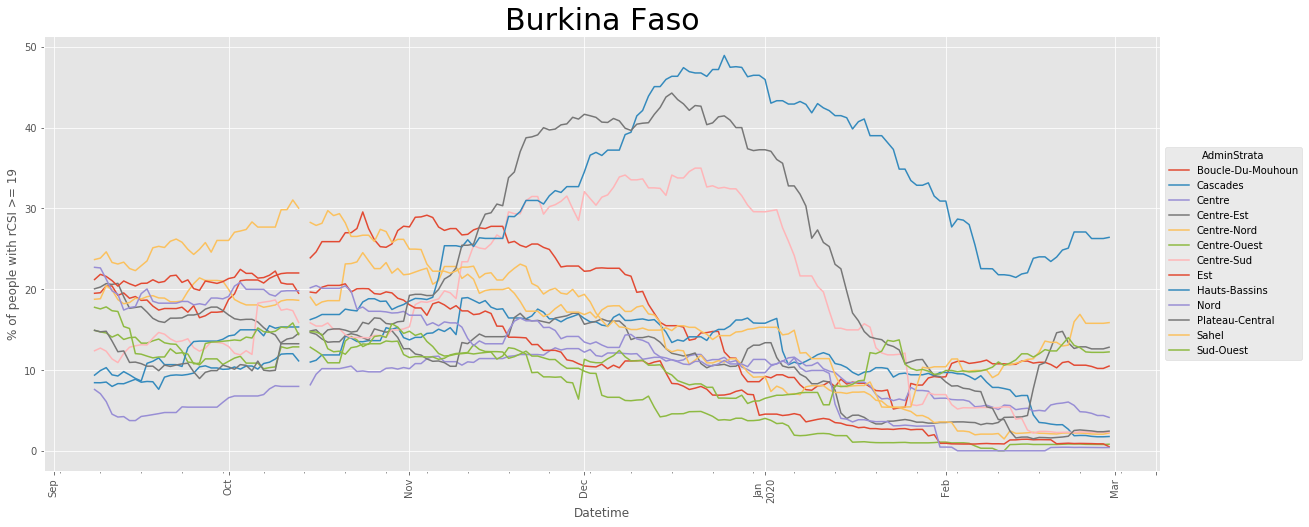

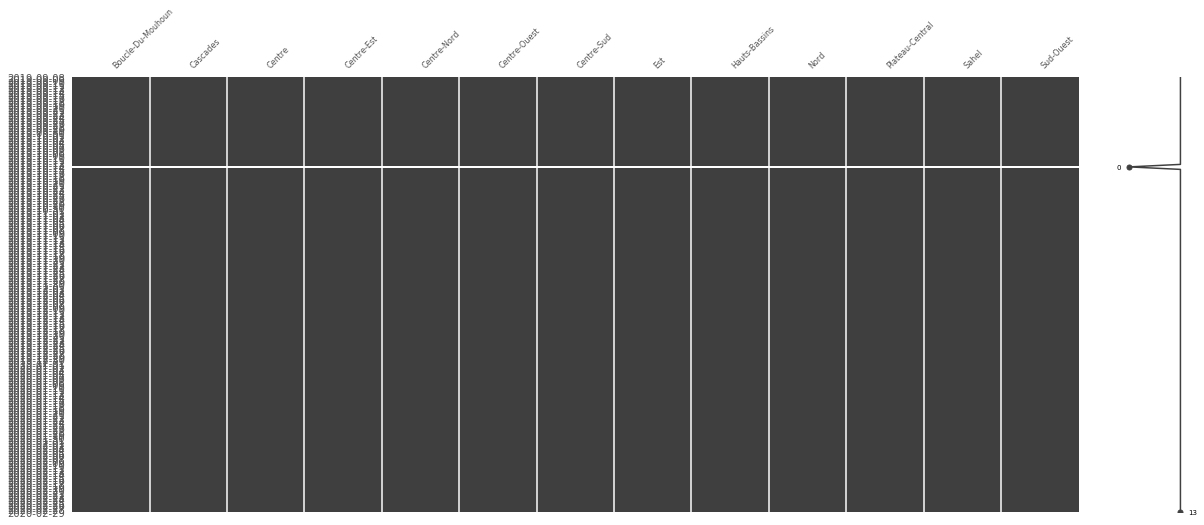

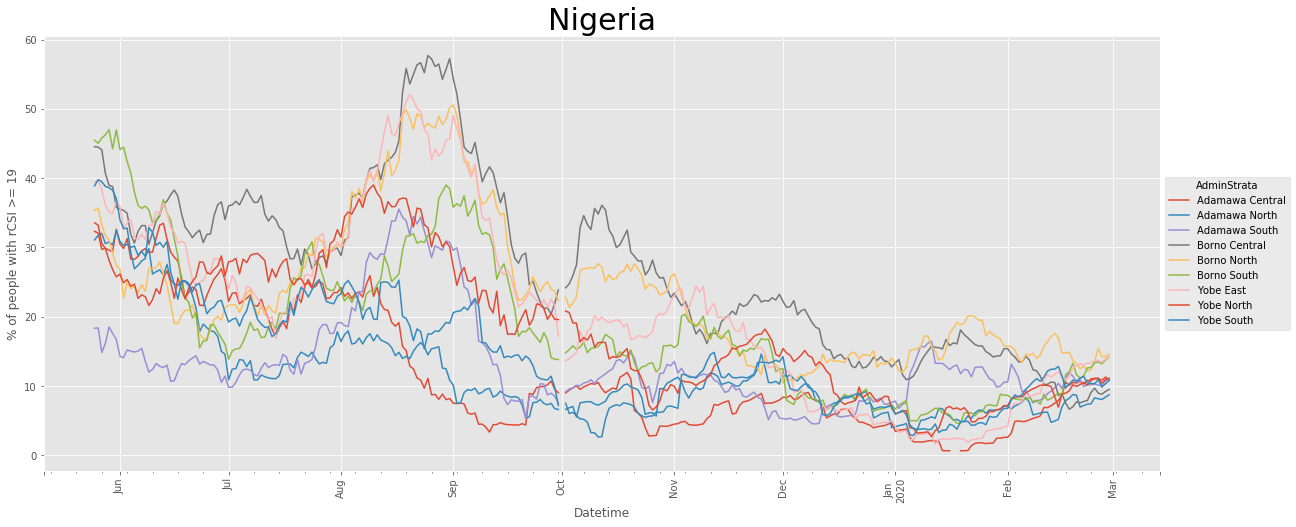

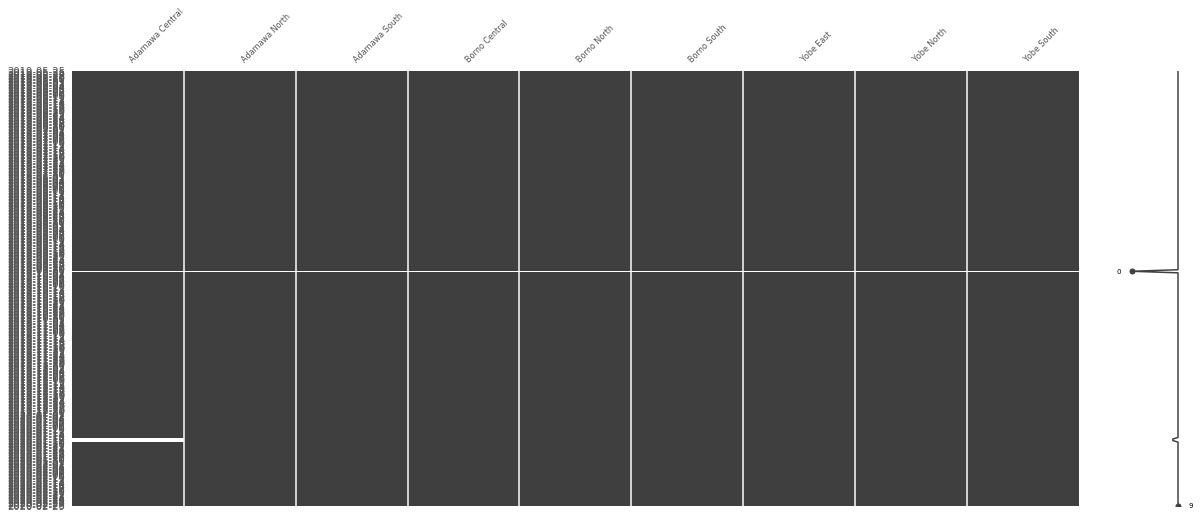

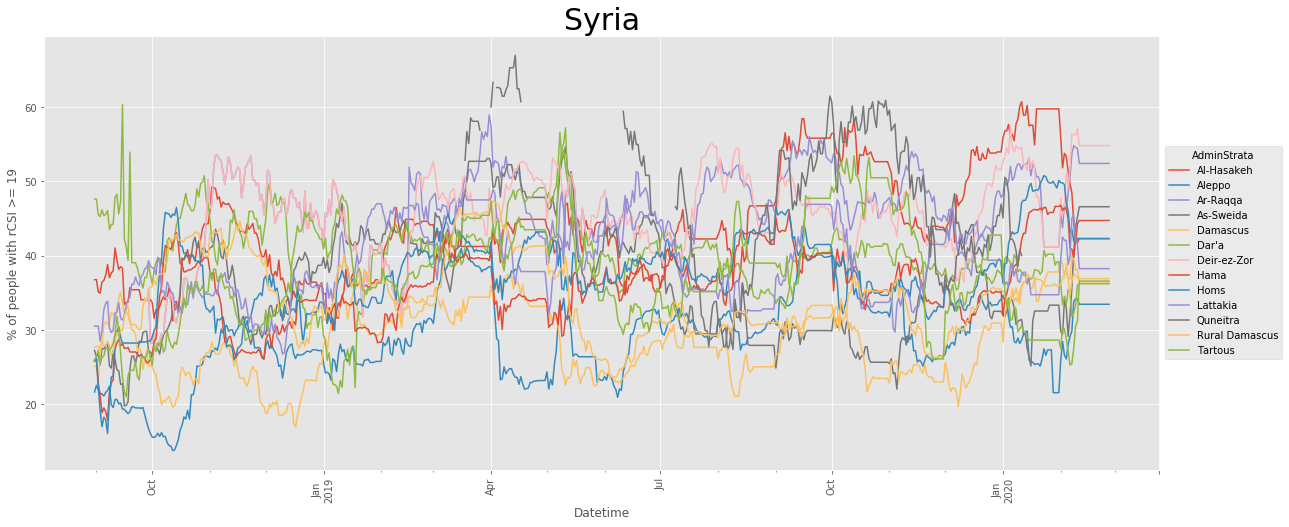

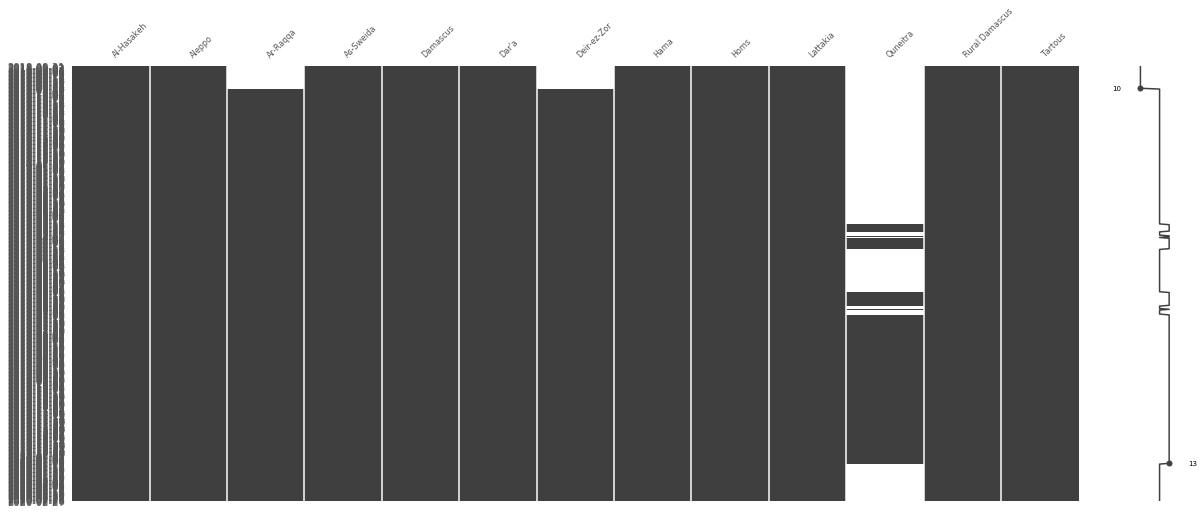

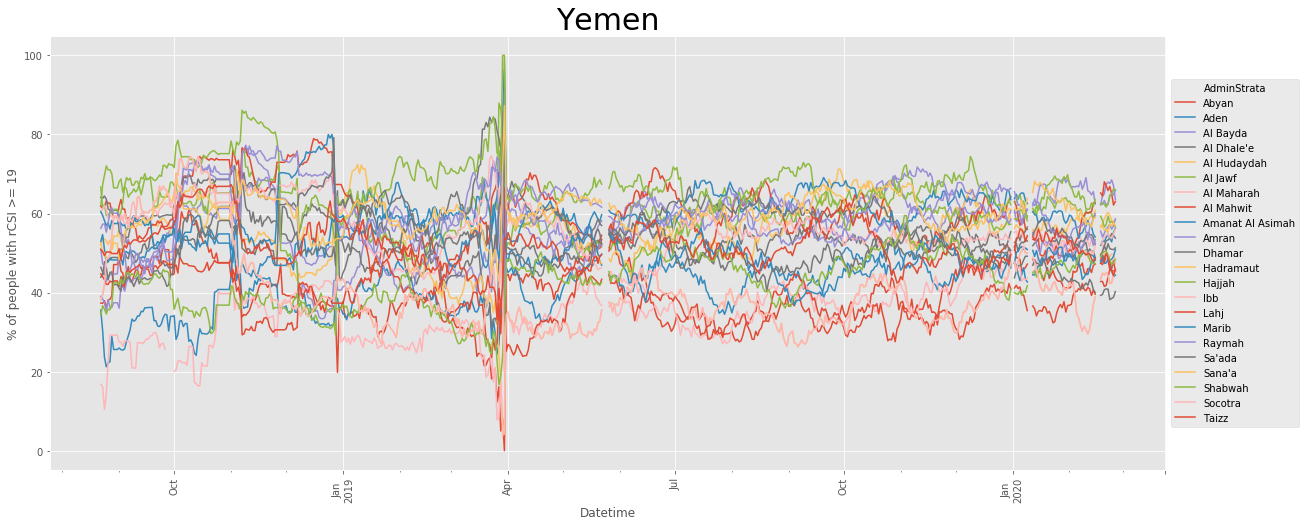

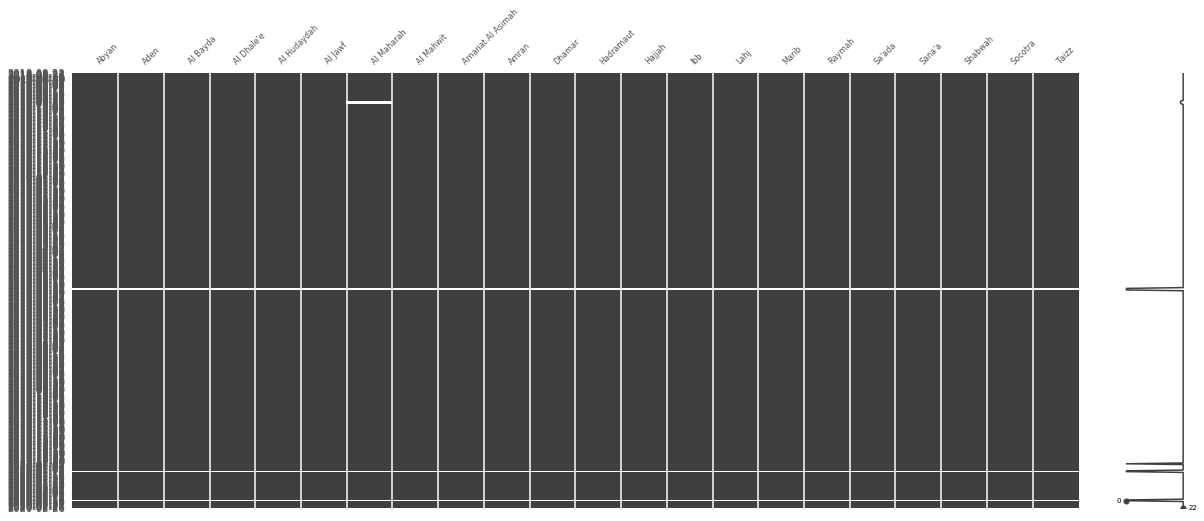

In [17]:
# Plot the time-series of the adminstrata.
def plot(group, freq, style, save = False, name = "wfp_rcsi_"):
    country = group.columns.get_level_values(0).unique()[0]
    f = plt.figure(figsize = (20, 8))
    plt.title(country, color = "black", fontsize = 30)
    group.columns = group.columns.droplevel()
    group.columns = group.columns.droplevel(1)
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    group.plot(ax = f.gca(), style = style)
    plt.legend(title = "AdminStrata", loc = "center left", bbox_to_anchor = (1.0, 0.5))
    plt.ylabel("% of people with rCSI >= 19")
    plt.xticks(rotation = 90)
    plt.autoscale()
    plt.show()
    plt.close()
   
    # Visualization of the missing values of the current time-series.
    miss = msno.matrix(group, freq = freq, figsize = (20, 8), fontsize = 8)
    
    # Readding the column index to indicate the corresonding indicator.
    group.columns = pd.MultiIndex.from_product([group.columns, ["*rCSI"]])
    
    if save:
        group.to_csv("./time-series/" + name + country + ".csv", index_label = False)
    
df_plot = df.groupby(axis = 1, level = 0).apply(lambda x: plot(x, df.index.freq, "-"))

## Adjusting the time-series

In [18]:
# I get the time-series for each country without nan values in the middle and with equal start and end between adminstrata of the same country.
def interpolation(group):   
    group.columns = group.columns.droplevel()
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    group = group.interpolate(method = "linear", limit = 7)
    # Delete time-series that still have some NaN values.
    group.dropna(inplace = True, axis = 1)
    return group

df_interpolate = df.groupby(axis = 1, level = 0).apply(interpolation)
df_interpolate.head()

Burkina Faso                                         \
           Boucle-Du-Mouhoun Cascades Centre Centre-Est Centre-Nord   
                       *rCSI    *rCSI  *rCSI      *rCSI       *rCSI   
Datetime                                                              
2018-08-22               NaN      NaN    NaN        NaN         NaN   
2018-08-23               NaN      NaN    NaN        NaN         NaN   
2018-08-24               NaN      NaN    NaN        NaN         NaN   
2018-08-25               NaN      NaN    NaN        NaN         NaN   
2018-08-26               NaN      NaN    NaN        NaN         NaN   

                                                              ...      Yemen  \
           Centre-Ouest Centre-Sud   Est Hauts-Bassins  Nord  ...     Hajjah   
                  *rCSI      *rCSI *rCSI         *rCSI *rCSI  ...      *rCSI   
Datetime                                                      ...              
2018-08-22          NaN        NaN   NaN           NaN   NaN  ...  66.698570   
2018-08-23          NaN        NaN   NaN           NaN   NaN  ...  61.331133   
2018-08-24          NaN        NaN   NaN           NaN   NaN  ...  62.286205   
2018-08-25          NaN        NaN   NaN           NaN   NaN  ...  59.525377   
2018-08-26          NaN        NaN   NaN           NaN   NaN  ...  59.384136   

                                                                              \
                  Ibb       Lahj      Marib     Raymah     Sa'ada     Sana'a   
                *rCSI      *rCSI      *rCSI      *rCSI      *rCSI      *rCSI   
Datetime                                                                       
2018-08-22  60.797456  44.782684  60.490004  56.301100  46.435518  52.667849   
2018-08-23  61.011650  44.038726  59.568557  57.324106  45.261947  50.214606   
2018-08-24  62.032249  43.296925  58.277608  57.417614  44.520462  50.073157   
2018-08-25  60.993741  42.149079  56.908462  55.324169  46.345940  48.791655   
2018-08-26  58.800240  42.146629  57.722567  57.666522  43.294599  48.839640   

                                             
              Shabwah    Socotra      Taizz  
                *rCSI      *rCSI      *rCSI  
Datetime                                     
2018-08-22  34.302200  38.303104  50.919038  
2018-08-23  36.742499  39.545071  50.415852  
2018-08-24  35.857748  41.867782  49.391298  
2018-08-25  34.658434  48.585591  50.302392  
2018-08-26  35.913080  48.662394  50.293046  

[5 rows x 54 columns]

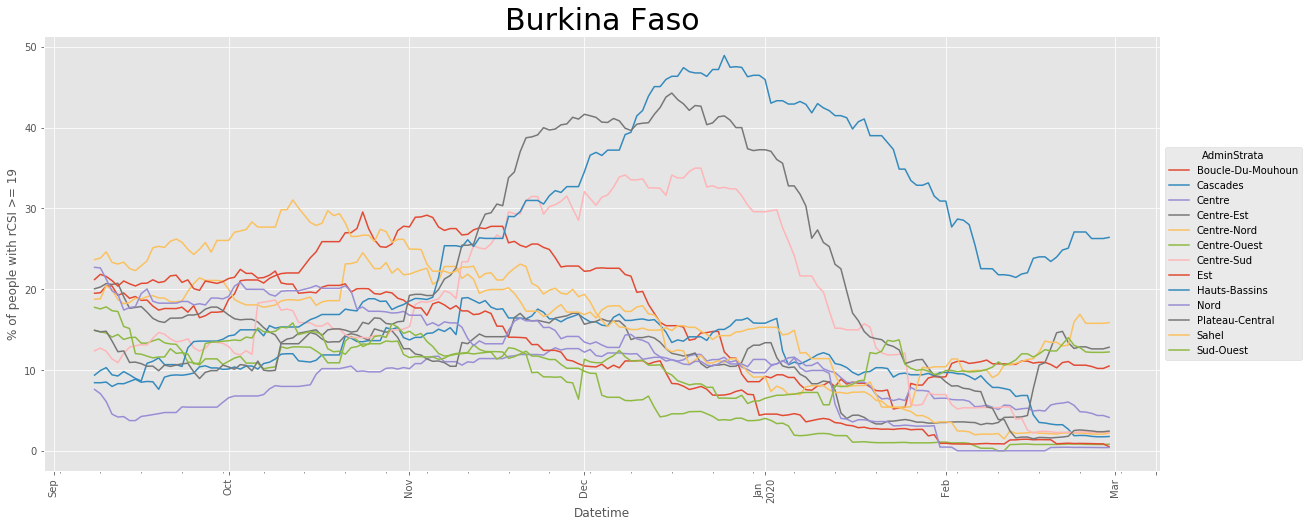

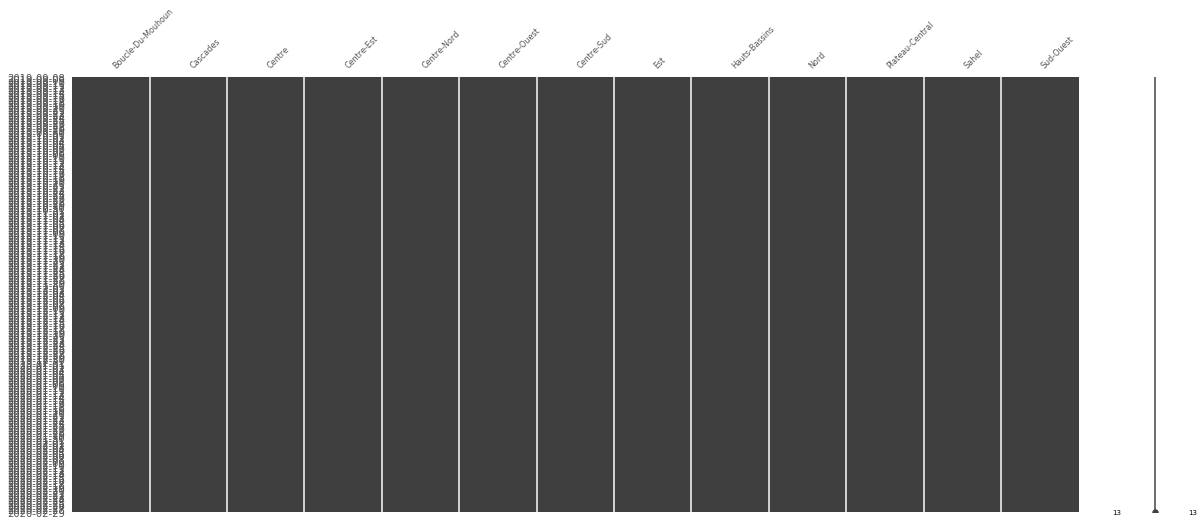

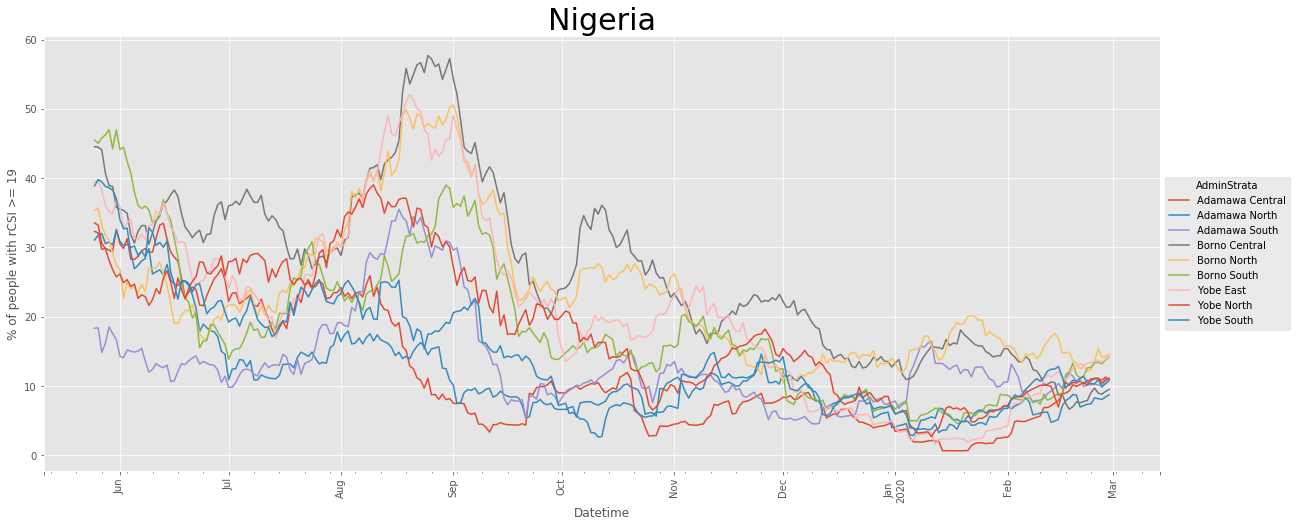

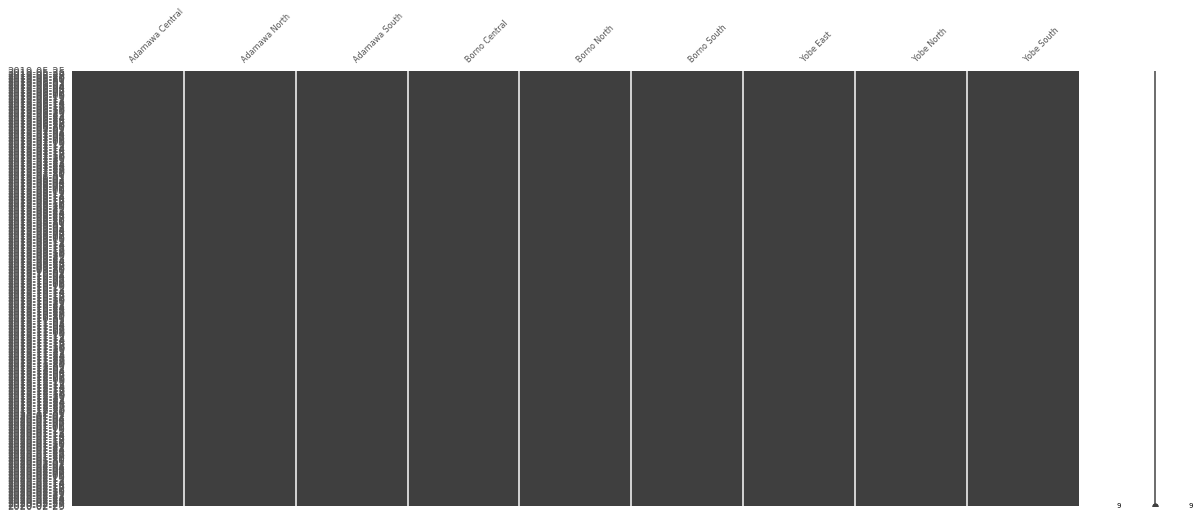

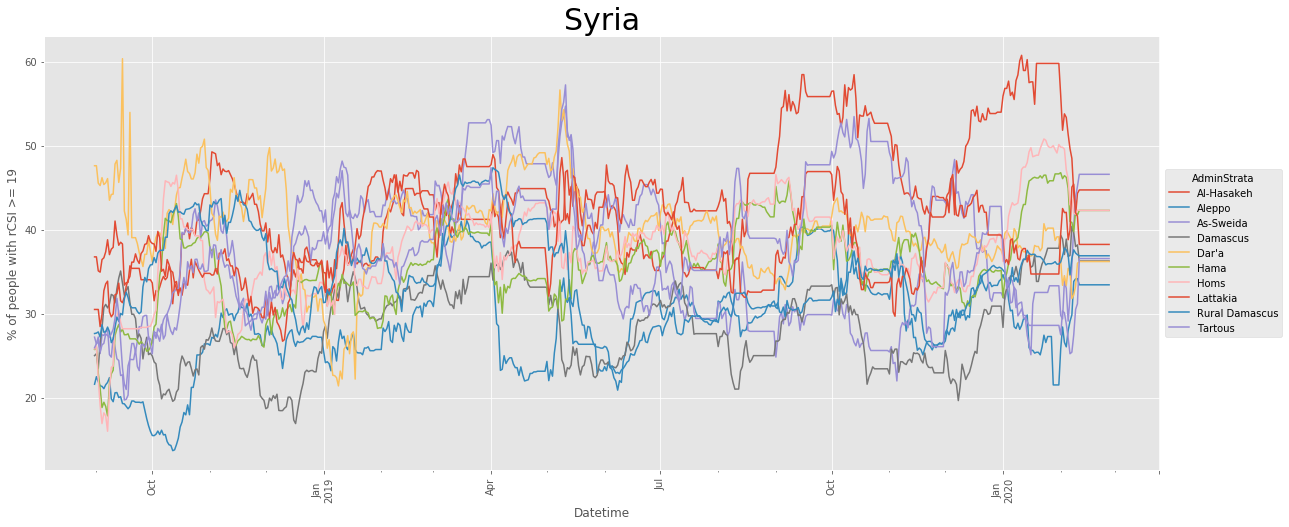

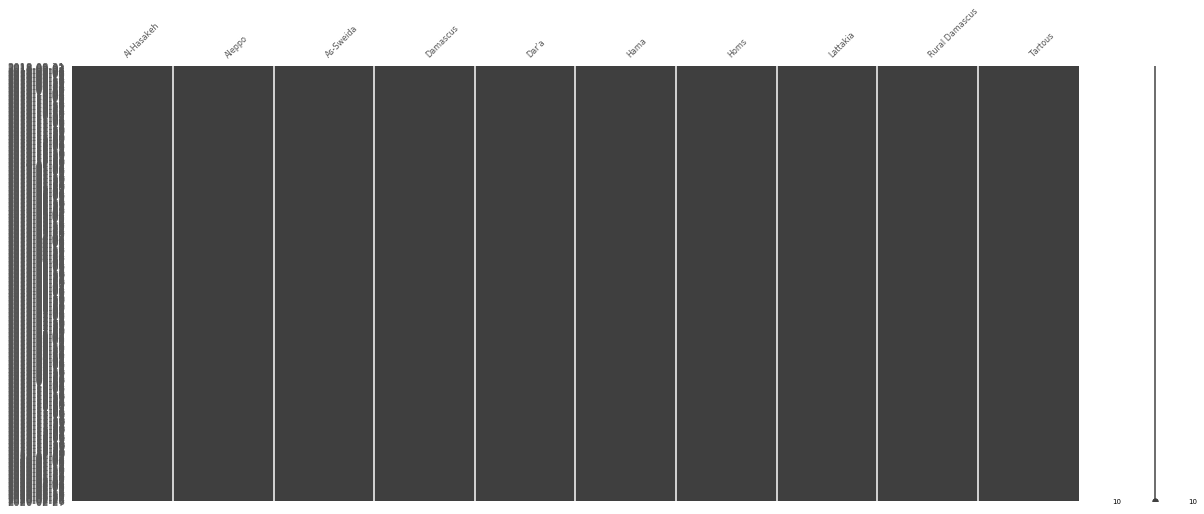

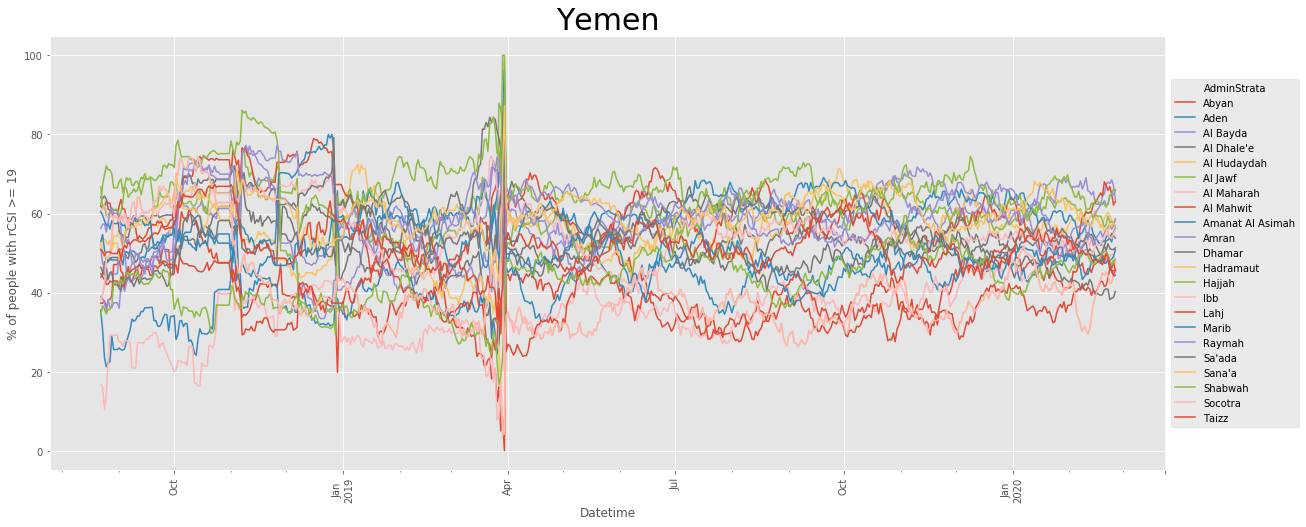

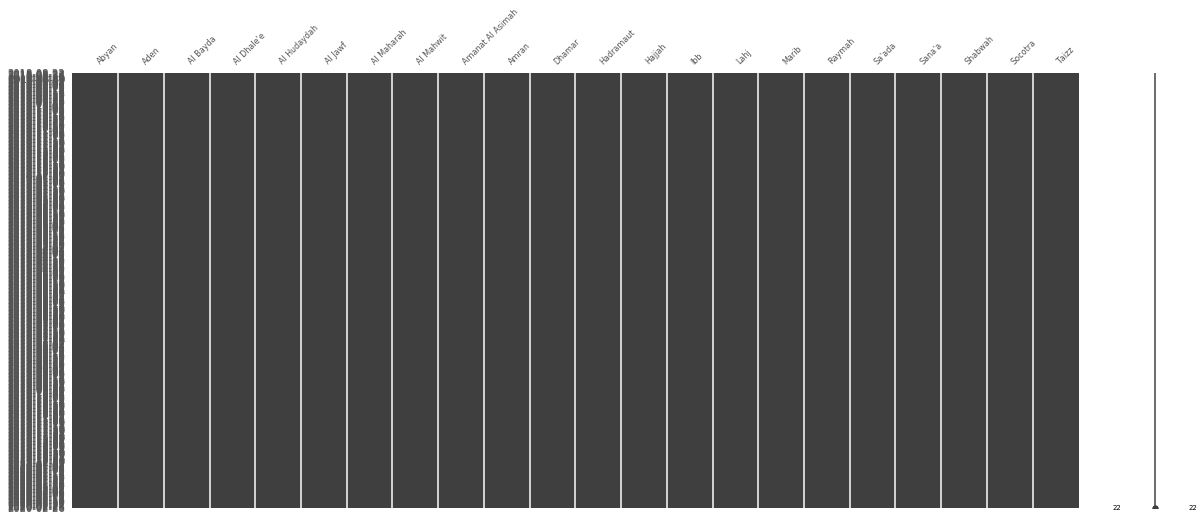

In [19]:
df_plot = df_interpolate.groupby(axis = 1, level = 0).apply(lambda x: plot(x, df_interpolate.index.freq, "-", True))

## Fit of the time-series (smooth data)

In [20]:
def fit(group):   
    group.columns = group.columns.droplevel()
    # Delete time-series that still have some NaN values.
    group.dropna(inplace = True, axis = 0)

    return group.rolling(window = 3).mean()

df_fit = df_interpolate.groupby(axis = 1, level = 0).apply(fit)
df_fit.dropna(axis = 0, how = "all", inplace = True)
df_fit.head()

Burkina Faso                                         \
           Boucle-Du-Mouhoun Cascades Centre Centre-Est Centre-Nord   
                       *rCSI    *rCSI  *rCSI      *rCSI       *rCSI   
Datetime                                                              
2018-08-24               NaN      NaN    NaN        NaN         NaN   
2018-08-25               NaN      NaN    NaN        NaN         NaN   
2018-08-26               NaN      NaN    NaN        NaN         NaN   
2018-08-27               NaN      NaN    NaN        NaN         NaN   
2018-08-28               NaN      NaN    NaN        NaN         NaN   

                                                              ...      Yemen  \
           Centre-Ouest Centre-Sud   Est Hauts-Bassins  Nord  ...     Hajjah   
                  *rCSI      *rCSI *rCSI         *rCSI *rCSI  ...      *rCSI   
Datetime                                                      ...              
2018-08-24          NaN        NaN   NaN           NaN   NaN  ...  63.438636   
2018-08-25          NaN        NaN   NaN           NaN   NaN  ...  61.047571   
2018-08-26          NaN        NaN   NaN           NaN   NaN  ...  60.398573   
2018-08-27          NaN        NaN   NaN           NaN   NaN  ...  59.822034   
2018-08-28          NaN        NaN   NaN           NaN   NaN  ...  59.991375   

                                                                              \
                  Ibb       Lahj      Marib     Raymah     Sa'ada     Sana'a   
                *rCSI      *rCSI      *rCSI      *rCSI      *rCSI      *rCSI   
Datetime                                                                       
2018-08-24  61.280452  44.039445  59.445390  57.014273  45.405976  50.985204   
2018-08-25  61.345880  43.161577  58.251542  56.688630  45.376116  49.693139   
2018-08-26  60.608743  42.530878  57.636212  56.802768  44.720334  49.234817   
2018-08-27  59.725873  42.423280  56.914555  57.759487  44.927473  49.071948   
2018-08-28  59.182952  42.614050  57.358721  59.809951  44.577761  49.753104   

                                             
              Shabwah    Socotra      Taizz  
                *rCSI      *rCSI      *rCSI  
Datetime                                     
2018-08-24  35.634149  39.905319  50.242063  
2018-08-25  35.752893  43.332815  50.036514  
2018-08-26  35.476421  46.371923  49.995579  
2018-08-27  35.428637  49.005441  50.319533  
2018-08-28  36.225142  50.920383  50.191451  

[5 rows x 54 columns]

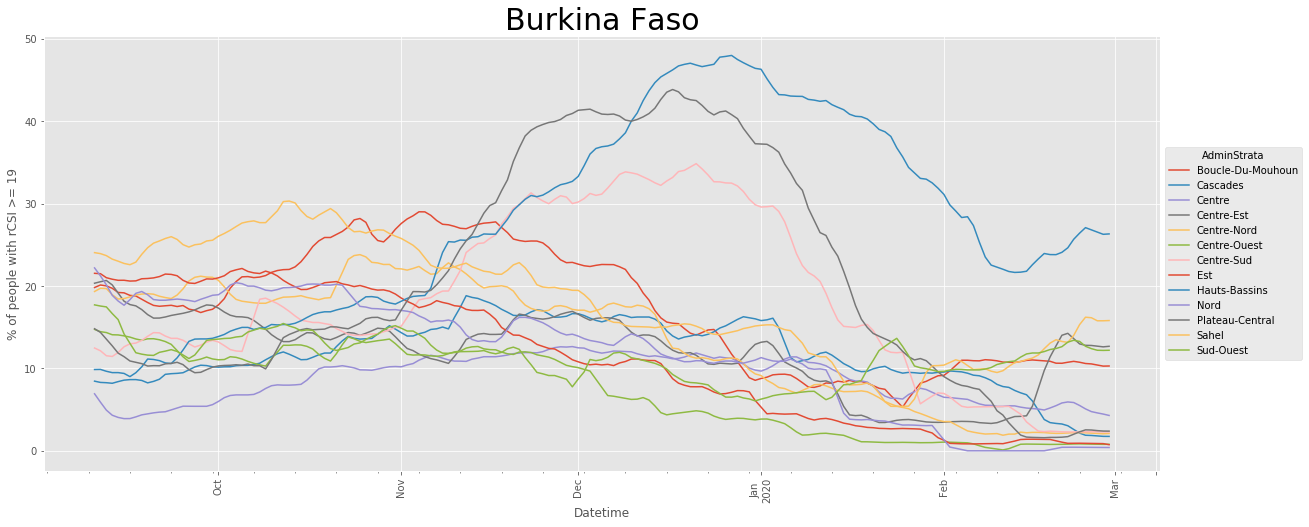

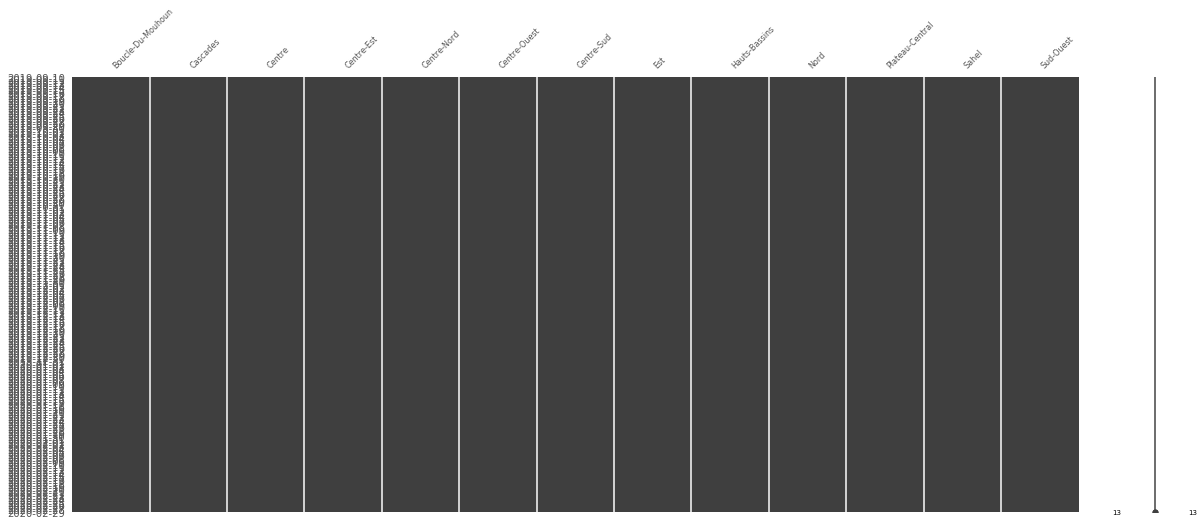

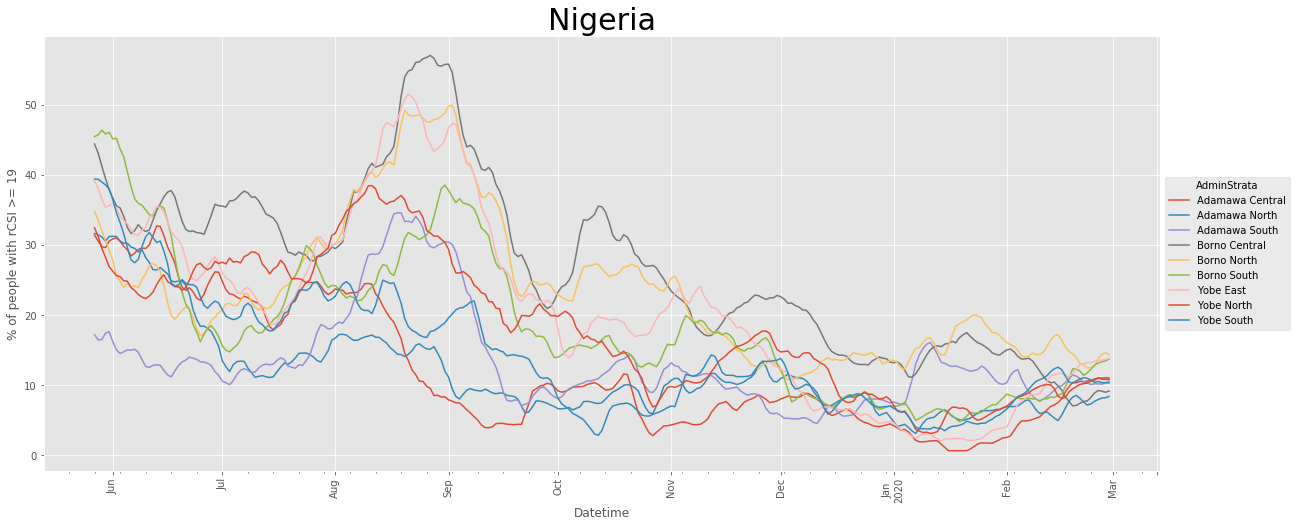

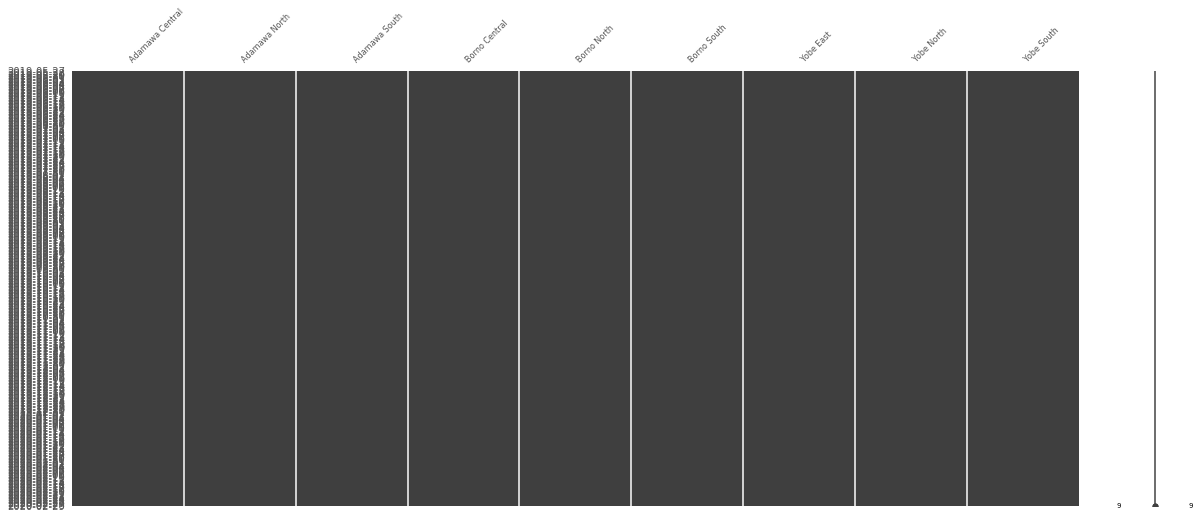

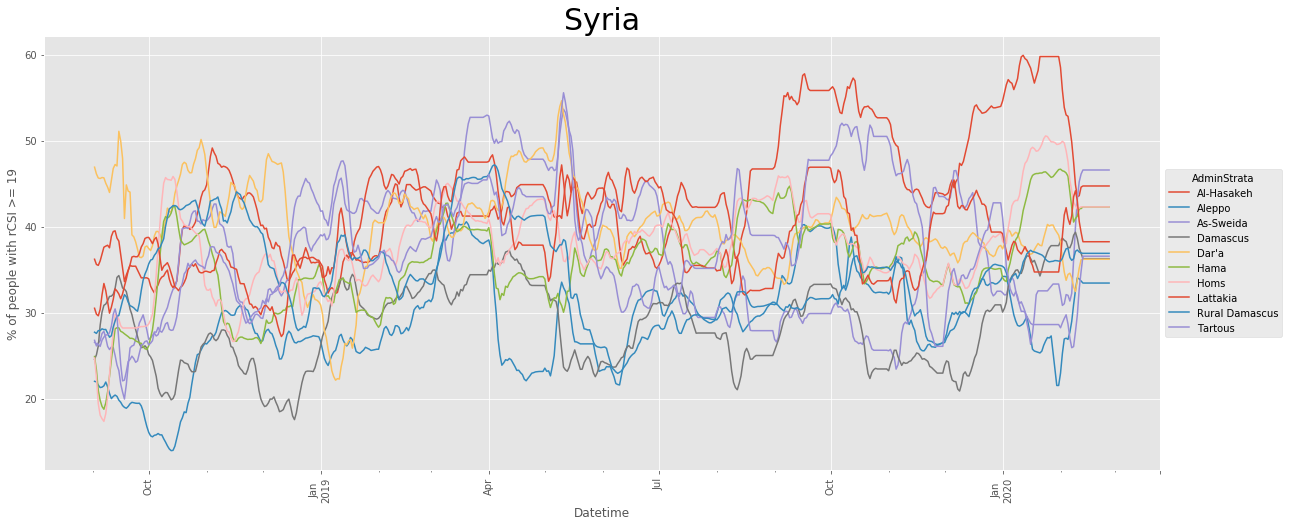

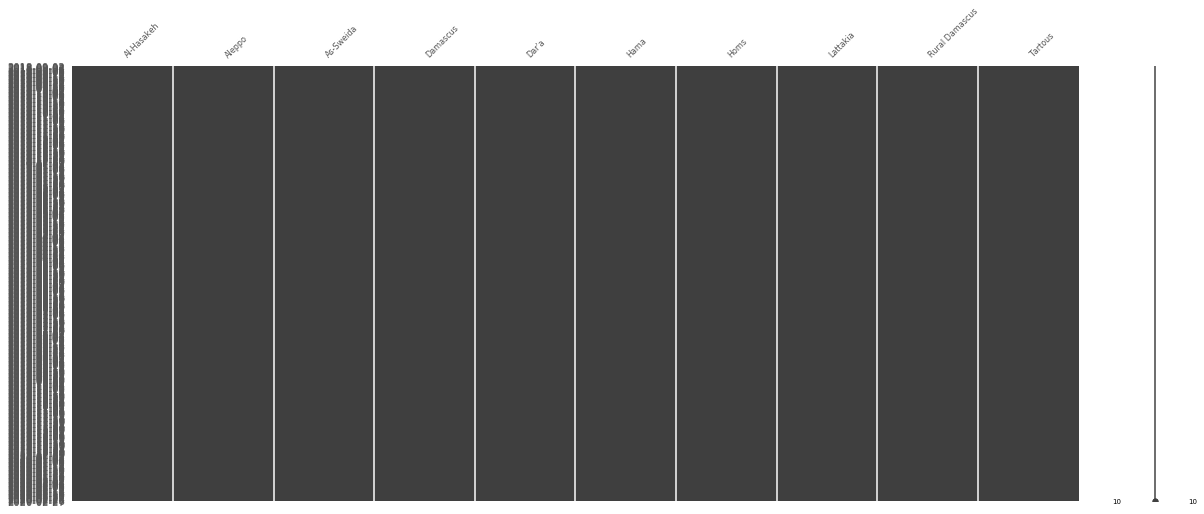

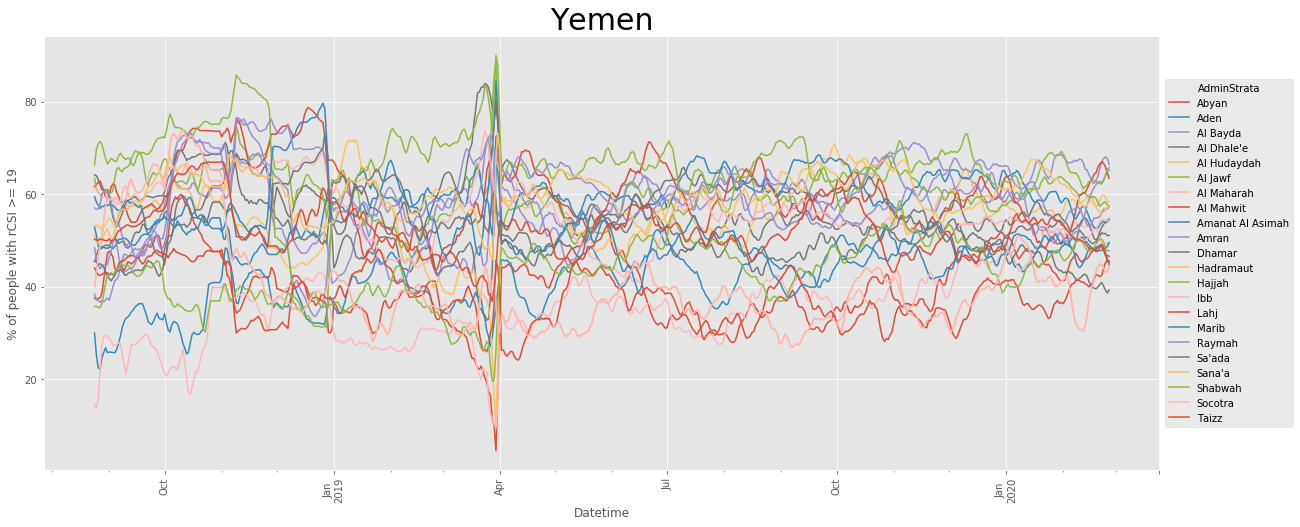

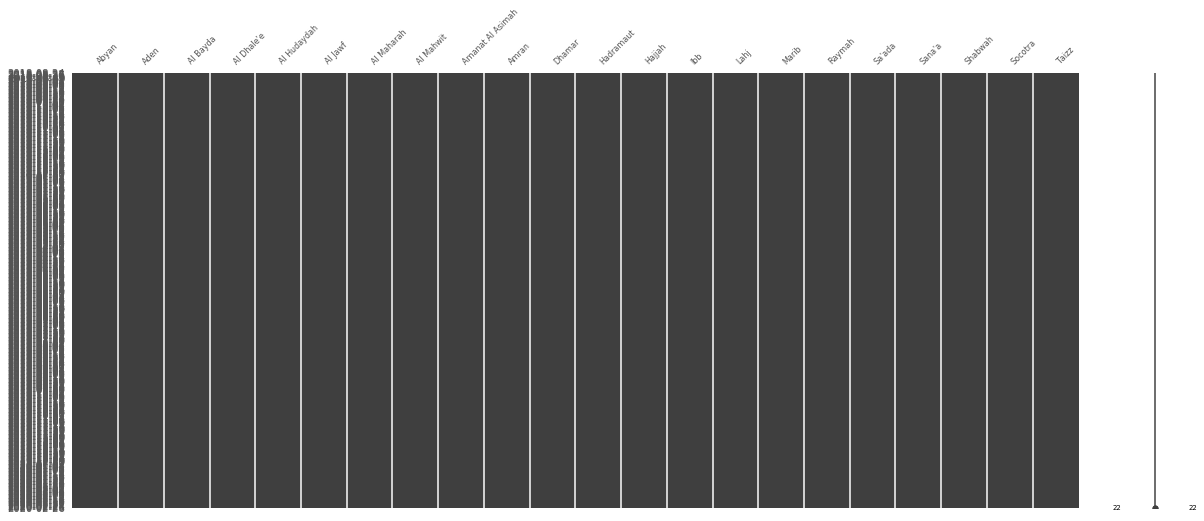

In [21]:
df_plot = df_fit.groupby(axis = 1, level = 0).apply(lambda x: plot(x, df_fit.index.freq, "-", True, "wfp_rcsi_smooth_"))

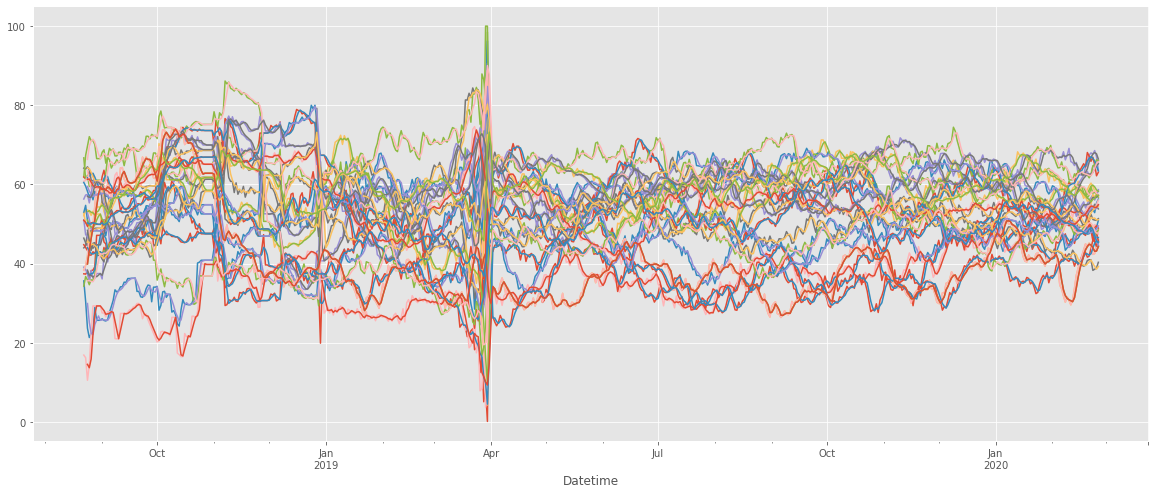

In [22]:
f = plt.figure(figsize = (20, 8))
df_interpolate.Yemen.plot(ax = f.gca(), legend = False)
df_fit.Yemen.plot(ax = f.gca(), legend = False)
plt.autoscale()